# Part B

# Algorithm Description

## Previous Algorithm Analysis

We want to improve the performance of **Item Response Theory (IRT) Model** in **Question 2**.

As reported in Question 2, we know the metrics of the original IRT Model as following:

|      | training | validation |
|--------|----------|------------|
|Accuracy|0.739    |0.705     |
|NLLK   |29718.216 |3935.151   |

Test Accuracy: 0.7047

Observing the training and validation curves during the training process, we can know that there is no huge difference between the accuracy of training data, validation data. This means the variance of the model is low and the overfitting of model is not severe. However, the accuracy of training dataset is only 0.739, which is not high and close to test accuracy. This indicates that the model is underfitting. 

In this way, in order to avoid underfitting, **we better increase the complexity of the original model.** Following this opinion, we come up with one key opinion and two modifications ideas.

## Algorithm Modification Ideas

**Key Intuition:** **student's ability to solve different types of questions are different.**

Some students might be good at algebra and statistics but not good at geometry. Some students might be interested 
in number but not keen on algebra. 

Instead of using overall ability of the student and overall difficulty of the questions, we can use more detailed information to train the model and predict student's behavior. This improve the complexity of this model and it supposed to have a better performance.

There are **two main modification ideas:**

**1. Train conditional Item Response Theory Model.**

- Mathematical definition: Train $\theta_{ik}$ and $\beta_{j|k}$ for each question type k, using the $p(c_{ij}|\theta_{ik}, \beta_{j|k}) = sigmoid(\theta_{ik} - \beta_{j |k})$.

- Explanation: $\theta_{ik}$ represents i-th student's ability to solve k type of question, $\beta_{j|k}$ represents the difficulty of j-th question under we know it is k type of question.

**2. Add a discriminative term to item response theory model**.

- Mathematical Definition: Train $\theta_i$, $\beta_j$ and $k_j$ using $p(c_{ij}|\theta_i, \beta_j)=c+(1-c) \times sigmoid(k_j(\theta_i-\beta_j))$
    
- Explanation: $k_j$ is how steep the sigmoid looks (i.e. how discriminative this type of question is)

- This idea comes from project tutorial slides, possible extension.

In [1]:
import PIL.Image

## Algorithm Box

**Notice:** Specific derivations can be found on the last page of the report.

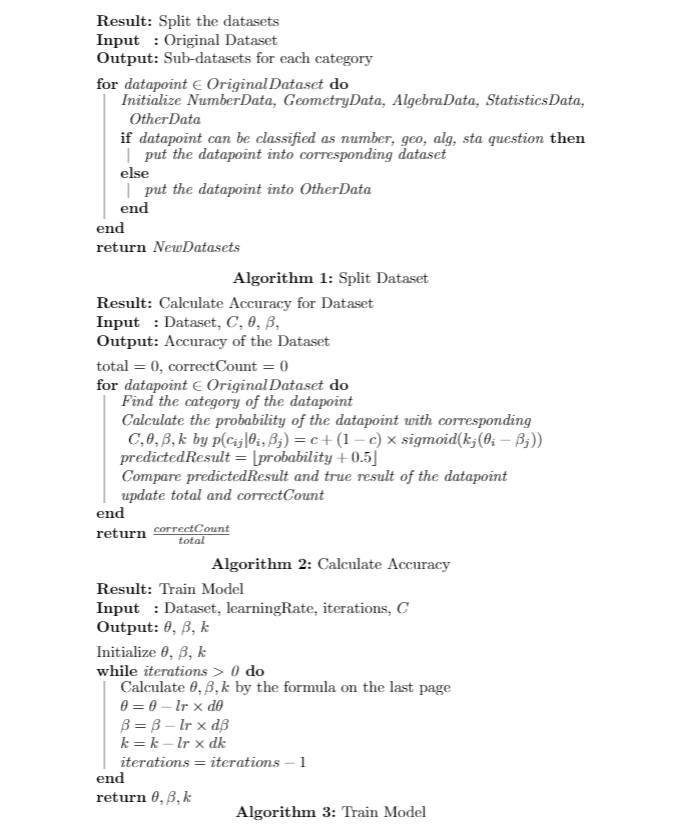

In [12]:
display(PIL.Image.open("pseudocode.png"))

## Model Training Process

We classify the questions into 5 categories: **Number, Algebra, Geometry, Statistics and Other**. This is because when we look into the subjects of questions, it is easy to observe that all questions are belonging to at least one of those five categories (1, 17, 39, 68 and others).

After training several models, we leave 2 models and combine them to get a final model.

**1. Model 1:** Discriminative IRT. This is based on modification idea 2.

**2. Model 2:** Conditional Discriminative IRT. 

- This is based on both modification idea 1 and 2, using $p(c_{ij}|\theta_{ik}, \beta_{j|k}) = c+(1-c) \times sigmoid(k_j(\theta_{ik}-\beta_{j|k}))$
 
**3. Final Combinational Model:** combination of Model 1 and Model 2. 

- We use Model 1 in terms of predicting questions in category Number and Algebra, and use Model 2 in terms of predicting questions in other categories.


# Result Comparison

Overall, the test accuracy of the **original model** is 0.7047 and the test accuracy of the **final combinational model** is 0.7144. 

To be see the detailed improvement of our accuracy, we will first show metrics for each category of **Conditional Discriminative IRT** (Model 2) and the **original model** as following:

|       |Original Validation Accuracy| Original Test Accuracy|Model 2 Validation Accuracy | Model 2 Test Accuracy | Number of data |
|----------|-------------------|-------------|-------------|-------------|-------------|
|Number   |0.7202|0.7007|0.7182|0.72062|25073|
|Algebra   |0.6887|0.7079|0.71842|0.70|12187|
|Statistics |0.7186|0.6950|0.6918|0.7003|14388|
|Geometry  |0.6952|0.71786|0.6962|0.7040|5177|
|Other |0.65517|0.6428|0.4643|0.6379|508|

Compared the result above, it is obvious that our **Conditional Discriminative IRT** can acheive a much better prediction result in **Number and Algebra** categories than the original model. We believe it is because we extract some feature of discriminative term $k_j$ for these two categories.

However, it is not very useful in predicting questions in **Statistics, Geometry and Other** category. This might be because the number of data for each question category influences the quality of the discriminative parameter $k_j$. Since the performance doesn't become better, we can know that for these 3 categories, we don't have sufficient data to extract the qualitative feature for $k_j$.

In that case, it is better to make predictions using less complex **Discriminative Model** (Model 1) to avoid overfitting. This is why we choose to combine Model 1 and Model 2 and obtain **Final Combinational Model**.

**In conclusion:**

1. We predict the questions in category Number and Algebra by Model 2

2. We predict the questions in category Geometry, Statistics and Other by Model 2. 

3. The Final Combinational Model can achieve a better performance (test accuracy 0.7144) than the original model (test accuracy 0.7047).

# Limitations

For both model 1 and 2, since we split the data into different categories, the size of data in each category is actually smaller than the original category. Due to this reason, our model might suffer from overfitting and results in a bad performace, and this phenomenon is extremely obvious in some categories. Therefore, it is better not to use the modified algorithm without having sufficient data.

One method to solve the lack of data is **using all data to train the model and predict the value using this model.**. For those categories with less data, we can use those parameters trained by all data to predict the result since the overall ability of students and difficulties of questions also can reflect the result of the performance of that students on some questions to some extent. **This method has already been implemented in this question.**

Another method to solve the lack of data is we can use **bagging** to improve the accuracy of the model. As we all know, bagging technique can be helpful to reduce the variance of the model. 

In addition, to extend the model further, we can also use metadata of students to improve the performance of the model. For example, we know the age of the students in the students metadata, based on common sense, if the student is too young, the student is not able to solve some hard questions especailly for some difficult math questions. Then in this way, we can consider find more detailed classes based on both age of students and question category. 

# $\theta, \beta, k$ Updates

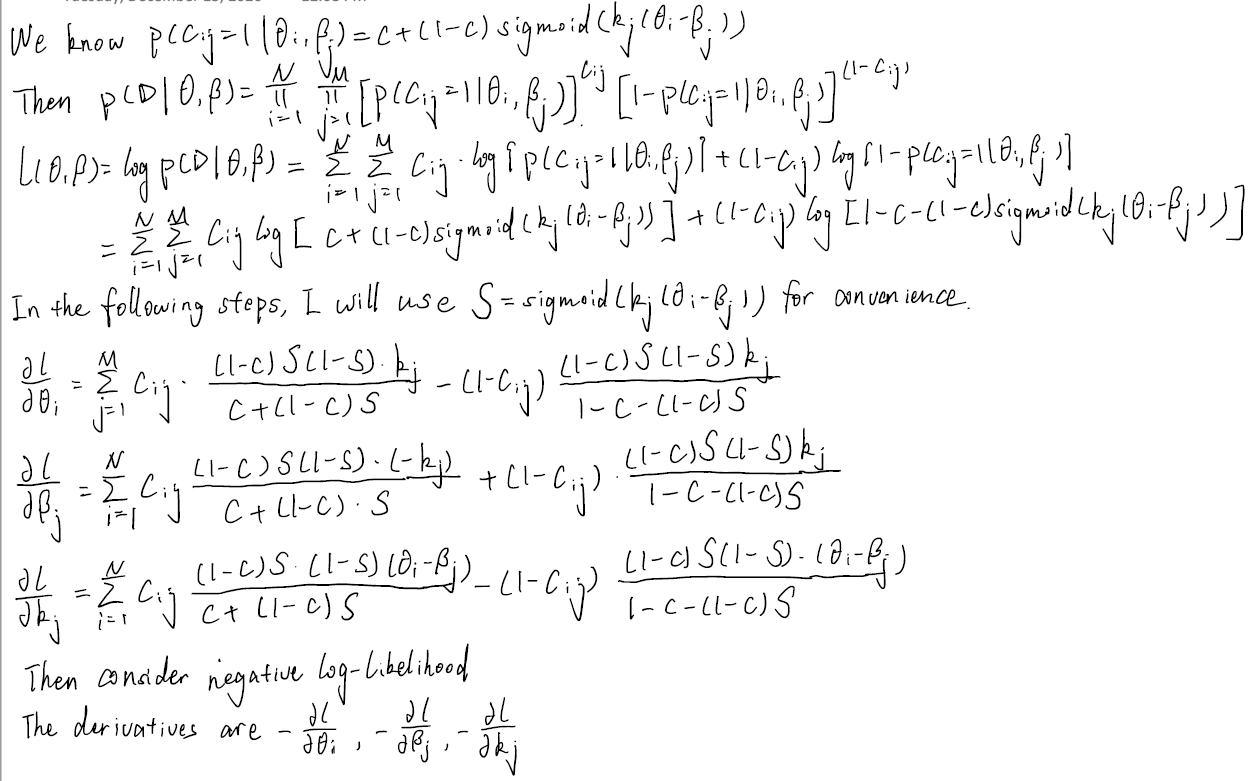

In [13]:
display(PIL.Image.open("derivation.png"))